In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# Bevezetés - Matplotlib

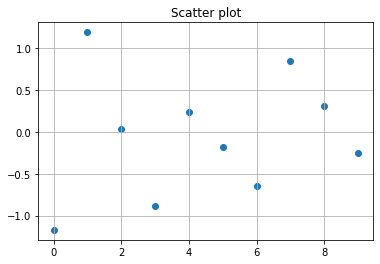

In [ ]:
# object oriented notation
fig, ax = plt.subplots()
ax.scatter(np.arange(10), np.random.randn(10))
ax.set_title("Scatter plot")
ax.grid()
fig.show()

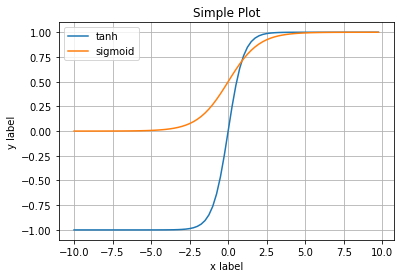

In [ ]:
# pyplot style
x = np.arange(-10, 10, 0.25)

plt.plot(x, np.tanh(x), label="tanh")
plt.plot(x, 1/(1 + np.exp(-x)), label="sigmoid")
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.grid()
plt.show()

Mindkét módszert lehet használni, csak fontos, hogy ne keverjük őket. Fejlesztéskor érdemes az objektum orientált módszert használni, interaktív ábráknal a másik is megfelelő

# Alap Keras workflow

## Adatbetöltés 

In [ ]:
(train_data, train_labels), (test_data, test_labels)= keras.datasets.mnist.load_data()

In [ ]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

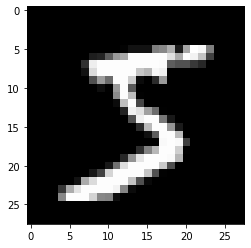

In [ ]:
plt.figure()
plt.imshow(train_data[0], cmap="gray")
plt.show()

## Háló architektúra összerakása

A hálót **Layer**-ekből építjük fel. Ezek az adott réteghez tartozó súlyokat tárolják és valamilyen műveletet végeznek rajtuk. Sokféle beépített **Layer** van, például **Dense**, **Conv2D**,... Ezek láncolatából épül fel a háló.

In [ ]:
input_layer = tf.keras.layers.Flatten(input_shape=(28,28))
middle_layer = tf.keras.layers.Dense(128, activation="relu")
output_layer = tf.keras.layers.Dense(10, activation="softmax")

### Dense réteg Keras-ban

A Dense osztály a [***keras.layers***](https://keras.io/layers/core/) modulban található. Az osztályt az alábbi argumokkal láthatjuk el (több is van, de ezek a legfőbbek):

```
keras.layers.Dense(units, 
                   activation=None,
                   input_shape=None,
                   use_bias=True, ...)
```

**Főbb argumentumai**

*  **units:** Pozitív egész, a kimenet méretét (dimenzióját) is megadja. A rétegben található neuronok száma.
*  **activation:** Aktivációs függvény. Ha nincs megadva, akkor nem alkalmaz aktivációs függvényt (tehát "*linear*" aktiváció lesz belőle: $a(x) = x$).  Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x). Corresponds to $g$ in the formula above (see [activations](https://keras.io/activations/)).
* **input_shape:** A bemeneti adatvektor mérete adható meg ezzel. Csak az első réteg esetén kell megani, a többi esetén automatikusan kiszámolja.
*  *use_bias:* Használjon-e bias vektort.
* stb...

A **Flatten** réteg, ahogy a nevében is van kilapítja a bemeneteként kapott mátrixot egy vektorrá (hasonlóan a numpy-ból ismert flatten() fügvényhez).


A rétegeket a szekvenciálisan összekötjük.

In [ ]:
model = keras.Sequential([
    input_layer,
    middle_layer,
    output_layer                       
])

In [ ]:
model = keras.Sequential()
model.add(input_layer)
model.add(middle_layer)
model.add(output_layer)

A model így még nem tanítható, költségfüggvényt még nem definiáltunk és optimalizáló algoritmust sem. Ezt a **compile** függvényben tudjuk megtenni.   

In [ ]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model tanítása
A **fit** függvénnyel tudjuk tanítani a hálót. Első két paramétere a tanítóadatok és a hozzájuk elvárt kimenetek. Az **epochs** nevesített paraméterrel beállíthatjuk, hogy hányszor iteráljon végig a tanítóadatokon.

In [ ]:
model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9892 - accuracy: 0.2332
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0056 - accuracy: 0.2297
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0784 - accuracy: 0.2091
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0557 - accuracy: 0.2144
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0828 - accuracy: 0.2123
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0419 - accuracy: 0.2207
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0271 - accuracy: 0.2142
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1003 - accuracy: 0.2040
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0137 - accuracy: 0.2237
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.036

## Model kiértékelése

Az **evaluate** függvénnyel becslünk címkét a teszt adatokra és ezt ki is értékeljük valamilyen metrika szerint.

A **predict** függvény csak a becsléseket adja vissza.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 2.0252 - accuracy: 0.2248


# Vörösbor minőségének értékelése

**Feladat:** Vörösborok minőségét értékeljük egy 10-es skálán a bor kémiai összetevői alapján egy Multilayer Perceptron (MLP) típusú neuronhálóval.

Az adatbázisok forrása: http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

Először letöltjük a változókat és az értékeléseket tartalmazó .csv fájlokt egy sztringbe. Erre hozzuk létre a `download_dataset()` függvényt, melyenk a paramétere egy link a letöltendő fájlra. Használjuk az `urllib` modult.

In [ ]:
import urllib

# implement your solution BELOW
def download_dataset(url):
    ftpstream = urllib.request.urlopen(url)
    content = ftpstream.read().decode("utf-8")
    return content
# implement your solution ABOVE 

prefix = "https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/"
attribute_data_text = download_dataset(prefix + "wine_attributes.csv")
quality_data_text = download_dataset(prefix + "wine_qualities.csv")
print(attribute_data_text[:300])

fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8
11.2;0.28;0.56;1.9


A fájl első sora a változók neveit tartalmazza, míg a többi sor az egyes mintaelemek esetében a változók értékeit, pontosvesszőkkel elválasztva. Írjuk ki az első 300 karaktert a változókat tartalmazó file-ból

**Dolgozzuk fel a letöltött sztringet!** Hozzuk létre a `preprocess_dataset` függvényt, melynek paramétere egy .csv fäjl, szöveges formában. A függvény alakítsa át a szöveget egy számokat tartalmazó, megfelelő alakú **numpy tömbbé**! Emelett a függvény adja vissza a válzotók neveit is! Az egyszerűség kedvéért dolgozzunk csak az első 1000 mintaelemmel! Az input és a címke tömbök típusa is np.float32 (lebegőpontos) típusú legyen. 

In [ ]:
# implement your solution BELOW
def preprocess_dataset(data_text):
    lines = data_text.split("\n")
    words = [line.split(";") for line in lines]
    attr_names = words[0]
    vals = words[1:1001]
    vals = [[float(item) for item in rec] for rec in vals]
    vals = np.array(vals, dtype=np.float32)
    return vals, attr_names
# implement your solution ABOVE

features, attr_names = preprocess_dataset(attribute_data_text)
labels, label_name = preprocess_dataset(quality_data_text)


print("Data attributes:")
print(attr_names)
print(features.shape)
print(labels.shape)
print(label_name)

print('Labels:', np.unique(labels, return_counts=True))

Data attributes:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
(1000, 11)
(1000, 1)
['quality']
Labels: (array([3., 4., 5., 6., 7., 8.], dtype=float32), array([  5,  32, 468, 364, 121,  10]))


## Változók eloszlása

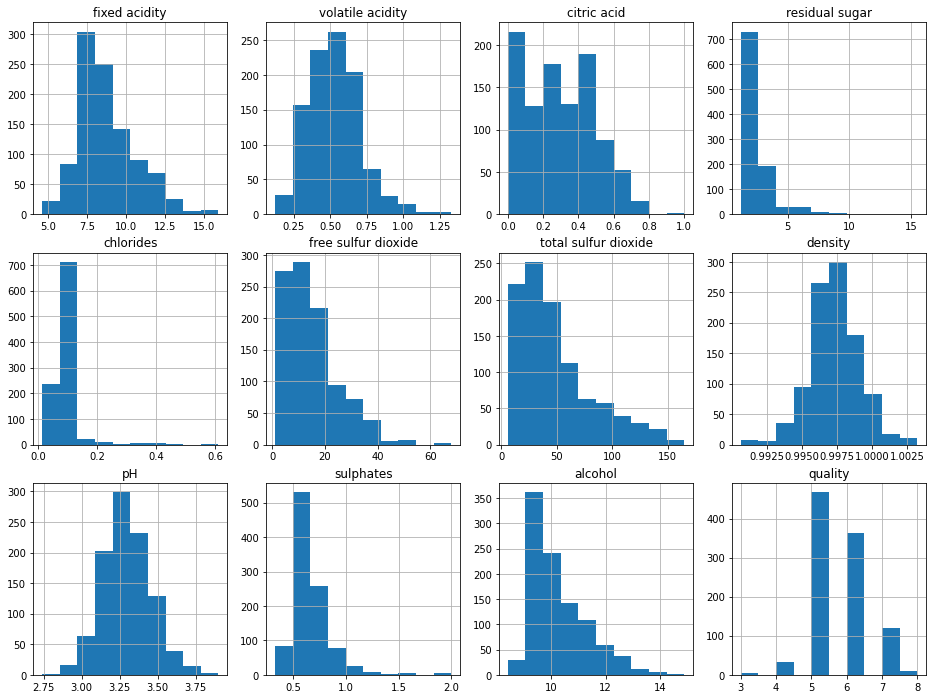

In [ ]:
plt.figure(figsize=(16, 12))
for i, (attr, feats) in enumerate(zip(attr_names, features.T)):
  plt.subplot(3, 4, i + 1)
  n, bins, patches = plt.hist(feats, label='')  
  plt.title(attr)
  plt.grid(True)

plt.subplot(3, 4, 12)
n, bins, patches = plt.hist(labels, label='')  
plt.title(label_name[0])
plt.grid(True)

plt.show()

## Tanító, validáló és teszt halmazok készítése

**Feladat:** bontsd fel a beolvasott adatbázist tanító, validáló és teszt halmazokra. A felosztás aránya 50-25-25 legyen. A mintákat nem kell összekeverni.



In [ ]:
# implement your solution BELOW
x_train_unnorm = features[:500]
y_train = labels[:500]

x_val_unnorm = features[500:750]
y_val = labels[500:750]

x_test_unnorm = features[750:]
y_test = labels[750:]
# implement your solution ABOVE

print(x_train_unnorm.shape)
print(y_train.shape)
print(x_val_unnorm.shape)
print(y_val.shape)
print(x_test_unnorm.shape)
print(y_test.shape)


(500, 11)
(500, 1)
(250, 11)
(250, 1)
(250, 11)
(250, 1)


## Változók sztenderdizálása

![normalization](https://people.inf.elte.hu/kacago/imgs/normalization.png)

Normalizálással robusztusabbá tudjuk tenni az osztályozónkat, mert kevésbé lesz érzékeny az input változására.  A skálázáshoz szükséges átlagot és szórást a tanítóhalmazon számoljuk ki, majd alkalmazzuk őket a validációs és a teszt halmazokra. Ez azért szükséges, mert a teszthalmazról azt feltételezzük, hogy ismeretlen a betanítás során, pontosan azért, hogy semmi esetre se tudjuk hozzáigazítani a tanított modellünket.

![effects of normalization](https://people.inf.elte.hu/kacago/imgs/normalization_effects.png)


**Feladat:** Implementáld az alábbi függvényt.
* `get_normalizer(training_data)`: A függvény a tanító adatokat kapja paramméterül. Ezekre illeszti a keras `Normalization` preprocesszáló rétegét, mely eltárolja az adatok átlagát és szórását. A függvény adja vissza ezt a réteget.

Ezután alkalmazzuk a normalizációt a tanító, validációs és tesztelő adatainkra.

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# implement your solution BELOW
def get_normalizer(data):
    norm_layer = Normalization(axis=-1)
    norm_layer.adapt(data)
    return norm_layer

normalizer = get_normalizer(x_train_unnorm)
x_train = normalizer(x_train_unnorm)
x_val = normalizer(x_val_unnorm)
x_test = normalizer(x_test_unnorm)
# implement your solution ABOVE

## Modell implementálása és tanítása

**Feladat:** implementálj egy 3 rétegű teljes konnektivitású modellt. Az első réteg mérete 20, aktivációs függvénynek pedig ReLU-t használj. A második réteg 10 neuronnal és ReLU aktivációval rendelkezik. Az utolsó réteg mérete és aktivációja legyen a kimenetnek megfelelő. A költségfüggvényünk a tanult átlagos négyzetes eltérés, más néven **mean squared error** (MSE) legyen. Optimalizáló algoritmusnak az SGD algoritmust használjuk, ami a gradiensmódszer egyik változata. A tanulási rátát ez utóbbi inicializációjakor adhatjuk meg.

In [ ]:
def create_regression_model():
    tf.random.set_seed(42)
    # implement your solution BELOW
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(20, activation="relu", input_dim=x_train.shape[1]))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(1))

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")
    # implement your solution ABOVE
    return model

**Tanítsuk be a modellünket a tanítóhalmazon!** A gradiens módszer implementációk (SGD, RMSprop, stb.) egy-egy iterációt nem a teljes tanítóhalmazon végeznek el. Ennyi adat sok alkalmazásnál nem férne el a memóriában egyszerre. Ehelyett az átlagos költséget és a gradienst egy lépésben csak egy kötegnyi (batch) mintaelemre számolják ki. A köteg méretét a `batch_size` paraméterrel tudjuk megadni. A tanítóhalmazt a Keras automatikusan kötegekre bontja. A gradiensmódszer lépéseinek számát az `epochs` paraméterrel tudjuk megadni: egy epoch alatt az optimalizáló algoritmus a tanítóhalmaz összes kötegén egyszer végigmegy.

Miközben a tanítóhalmazra tanítunk, szeretnénk a validációs halmazon mérni a modell teljesítményét. Ha a validációs költség jelentősen nagyobb, mint a tanítóköltség, nagy valószínűséggel túltanulás lépett fel. **Tanítsuk 400 epoch-ig a hálót, majd írassuk ki a betanított modell költségét a tanítóhalmazon és a validációs halmazon!**

A `verbose` paraméter 1-re, vagy 2re állításával a `fit()` eljárás kiírja a tanító és validációs hiba alakulását minden epoch végén.


In [ ]:
# implement your solution BELOW
reg_model = create_regression_model()

history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
              batch_size=64, epochs=400, verbose=1)

tr_losses = history.history["loss"]
val_losses = history.history["val_loss"]
# implement your solution ABOVE
print("Final training loss: ", tr_losses[-1])
print("Final validation loss: ", val_losses[-1])

Epoch 1/400
8/8 [==============================] - 0s 22ms/step - loss: 33.0737 - val_loss: 9.1313
Epoch 2/400
8/8 [==============================] - 0s 6ms/step - loss: 7.7423 - val_loss: 2.3869
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 2.1384 - val_loss: 1.7973
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 1.6474 - val_loss: 1.3872
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 1.3635 - val_loss: 1.1229
Epoch 6/400
8/8 [==============================] - 0s 7ms/step - loss: 1.2305 - val_loss: 1.0125
Epoch 7/400
8/8 [==============================] - 0s 8ms/step - loss: 1.0485 - val_loss: 0.9811
Epoch 8/400
8/8 [==============================] - 0s 7ms/step - loss: 0.9572 - val_loss: 0.8796
Epoch 9/400
8/8 [==============================] - 0s 7ms/step - loss: 0.8559 - val_loss: 0.8105
Epoch 10/400
8/8 [==============================] - 0s 7ms/step - loss: 0.8295 - val_loss: 0.7838
Epoch 11/400
8/8 [=========

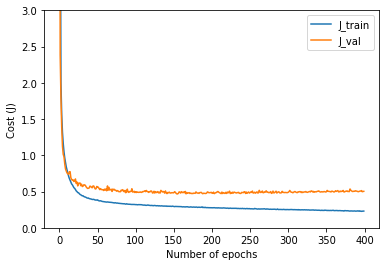

In [ ]:
plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
plt.ylim((0,3))
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()
plt.show();

### Regularizáció

**Dropout** egy regularizációs módszer, amely segítségével a tanítás során (minden iteráció esetén) véletlenszerűen "eldobhatunk", 0-ra állíthatunk neuronokat egy adott rétegben. Ez csökkenti a háló kapacitását, valamint arra kényszeríti, hogy több alternatív útvonalat is figyelembe vegyen, mert nem bízhat abban, hogy mindig minden neuron elérhető lesz, ezáltal redundás dolgokat is fog tanulni az egyes ágakon. Azt, hogy a neuronok hányad részét dobjuk el, a dropout rátája határozza meg. Tesztelés esetén nem használunk dropout-ot, tehát nem kapcsolunk ki neuronokat, azaz minden útvonal elérhető lesz a háló számára. Enélkül nem lenne determinisztikus a háló eredménye, minden kiértékelés más és más eredményhez vezetne. 

![dropout](https://people.inf.elte.hu/kacago/imgs/dropout.png)

Kerasban dropout-ot a `keras.layers.Dropout` réteggel tudunk belerakni a hálóba, amely az azt megelőző rétegre fog hatni. Szükség esetén akár több rétegre is alkalmazhatunk dropout-ot.

**Early stopping**-gal megállíthatjuk a tanítást, mielőtt túltanulna (overfit-elne) a háló a tanító halmazon. Így a kiértékelés során azt a modellt (súlyokat) tudjuk használni, amely még nem overfit-elt az adatokon.

![early stopping](https://people.inf.elte.hu/kacago/imgs/early_stopping.png)

Kerasban ezt a `keras.callbacks.EarlyStopping` callback-kel tudjuk használni. A callback-ek olyan objektumok, melyek bizonyos események kiváltásakor hívódnak meg. Ez lehet pl. új epoch/batch kezdete vagy vége. Az [early stopping](https://keras.io/callbacks)nak 3 főbb paramétere van:
* *monitor:* milyen metrikát figyeljen, alapértemezetten 'val_loss', tehát ezt nem kell újra megadnunk.
* *patience:* hány epoch után állítsa le a tanítást, ha nem javul az adott metrika.
* *restore_best_weights:* visszaállítsa-e a legjobb metrikájó modellt. Alapértelmezetten False-ra van állítva.
* ...


**Feladat:** Módosítsd a korábbi modelt úgy, hogy a 10 neuront tartalmazó rétegre alkalmazz  egy 50%-os `keras.layers.Dropout` réteget. A model tanításánál használj early stoppingot! 

In [ ]:
def create_regression_model_with_dropout():
    tf.random.set_seed(42)
    # implement your solution BELOW
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(20, activation="relu", input_dim=x_train.shape[1]))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1))

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="mse")

    # implement your solution ABOVE
    return model

In [ ]:
# implement your solution BELOW
reg_model = create_regression_model_with_dropout()

earlystopping_callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, )

history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
              batch_size=64, epochs=400, verbose=1, callbacks=[earlystopping_callback])

# implement your solution ABOVE

tr_losses = history.history['loss']
val_losses = history.history['val_loss']

print("Final training loss: ", tr_losses[-1])
print("Final validation loss: ", val_losses[-1])

Epoch 1/400
8/8 [==============================] - 0s 24ms/step - loss: 33.5476 - val_loss: 9.7423
Epoch 2/400
8/8 [==============================] - 0s 7ms/step - loss: 10.8974 - val_loss: 3.0324
Epoch 3/400
8/8 [==============================] - 0s 8ms/step - loss: 6.3699 - val_loss: 2.0843
Epoch 4/400
8/8 [==============================] - 0s 9ms/step - loss: 5.3197 - val_loss: 1.6407
Epoch 5/400
8/8 [==============================] - 0s 8ms/step - loss: 4.2901 - val_loss: 1.4330
Epoch 6/400
8/8 [==============================] - 0s 8ms/step - loss: 4.3410 - val_loss: 1.6391
Epoch 7/400
8/8 [==============================] - 0s 7ms/step - loss: 3.6751 - val_loss: 1.1918
Epoch 8/400
8/8 [==============================] - 0s 7ms/step - loss: 3.5222 - val_loss: 0.9992
Epoch 9/400
8/8 [==============================] - 0s 8ms/step - loss: 3.2625 - val_loss: 1.0039
Epoch 10/400
8/8 [==============================] - 0s 8ms/step - loss: 2.8523 - val_loss: 0.8704
Epoch 11/400
8/8 [========

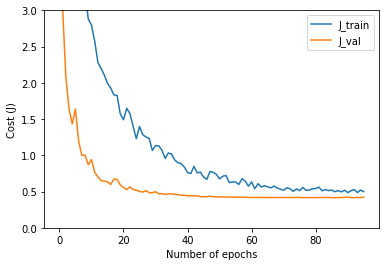

In [ ]:
plt.plot(tr_losses, label="J_train")
plt.plot(val_losses, label="J_val")
plt.ylim((0,3))
plt.xlabel("Number of epochs")
plt.ylabel("Cost (J)")
plt.legend()

## Model kiértékelése

**Feladat:** számold ki az abszolút hibát (MAE-t) a teszt halmazon, és a **mean squared error**-t (MSE-t). 

In [ ]:
# implement your solution BELOW
mse_test = reg_model.evaluate(x_test, y_test)

y_test_predicted = reg_model.predict(x_test)
mae_test = np.mean(np.abs(y_test_predicted - y_test))
# implement your solution ABOVE
print("Final test loss (MSE): ", mse_test)
print("Final test absolute error (MAE): ", mae_test)


8/8 [==============================] - 0s 2ms/step - loss: 0.4967
Final test loss (MSE):  0.4966687560081482
Final test absolute error (MAE):  0.5552168
